Wine Quality Prediction using Linear Regression Model

Here we will predict the quality of wine according to the time passes

In [15]:
#Importing dependencies
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
#Importing dataset
winedata = pd.read_csv('winequality-red.csv')
winedata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
#this is labled data
winedata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [29]:
#preprocessing the data
winedata.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

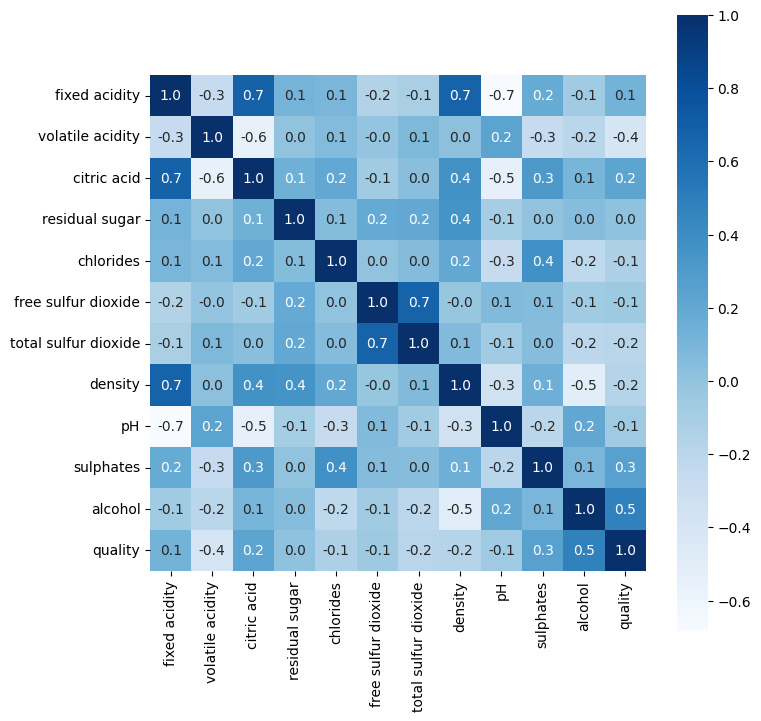

In [20]:
#confusion matrices - correlation between data
correlation = winedata.corr() #TN - True Negative
fig = plt.subplots(figsize=(8,8))
sns.heatmap(correlation, vmax=1, square=True, fmt='.1f', annot=True, cmap='Blues')

C:\Users\Daddy\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


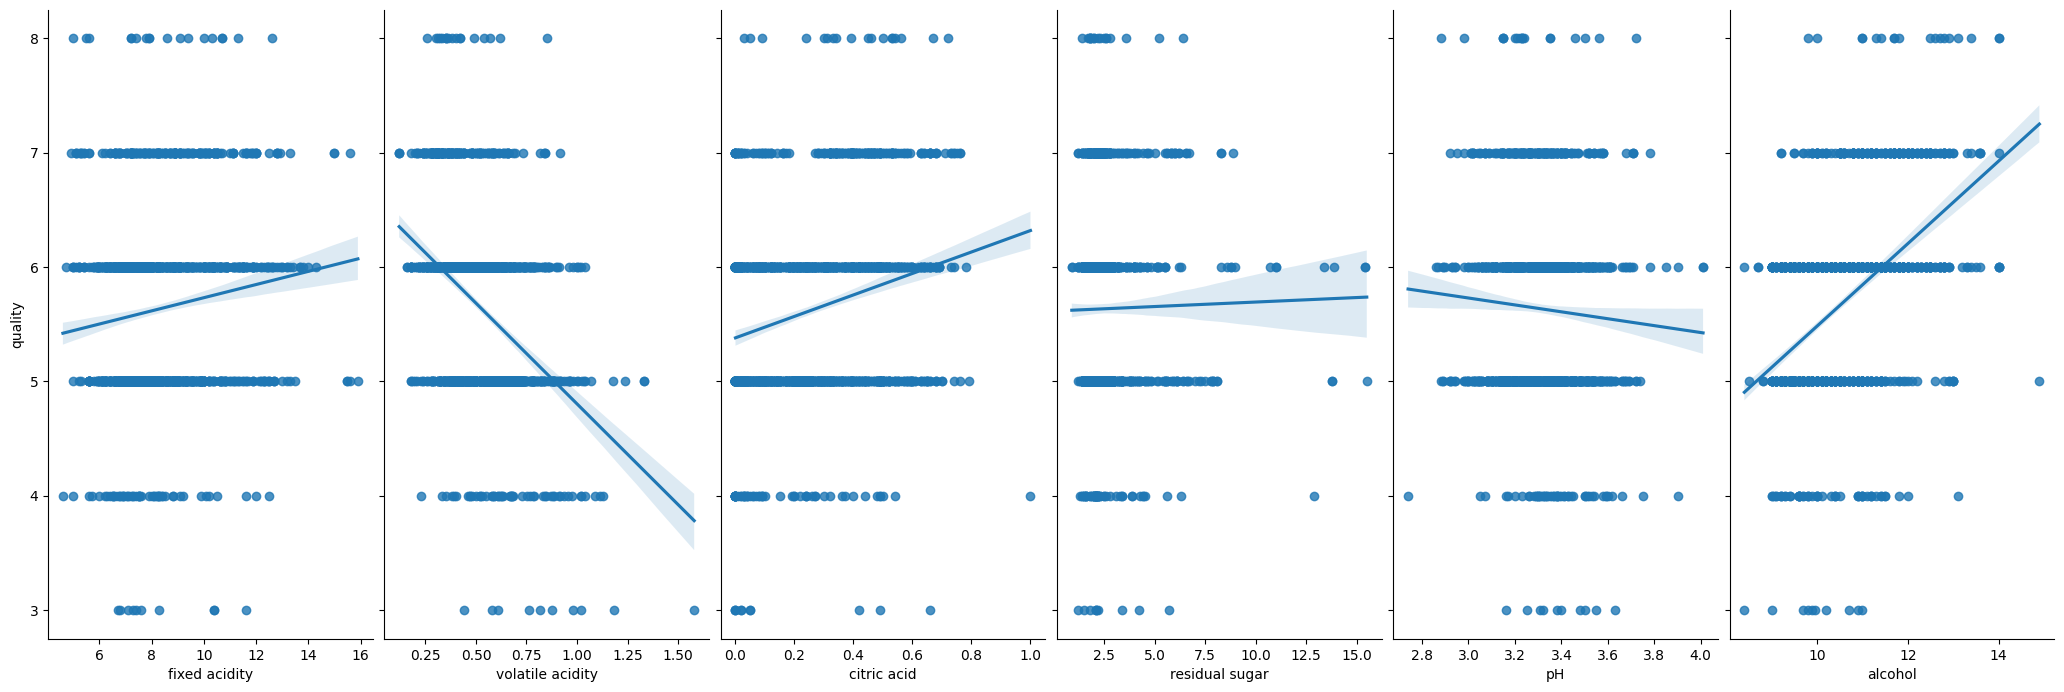

In [21]:
#selecting features accordingly to communicate with it
features = ['fixed acidity','volatile acidity','citric acid','residual sugar','pH','alcohol']
x = winedata[features]
y = winedata['quality']

sns.pairplot(winedata, x_vars=features, y_vars='quality', kind='reg', size=7, aspect=0.5)

In [22]:
#splitting the data to train and test the model
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=3)

In [23]:
#training the model with Linear Regression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [24]:
#predicting wine accuracy according to aging
accuracy = regressor.score(x_test, y_test)
print('Accuracy : {}%'.format(int(round(accuracy*100))))

Accuracy : 34%


In [14]:
#which means I have a loss of 66% of wine quality with respect to time